# Linear Model Assumptions

Linear regression assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random and normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

- Linear and Logistic Regression

- Linear Discriminant Analysis (LDA)

**Failure to meet one or more of the model assumptions could end up in a poor model performance**.

If the assumptions are not met, we can:

- Use a different, no-linear model to predict the outcome from the variables.

- Transform the input variables so that they meet the assumptions.

## Performance of a linear model

To determine if a linear model fits the data well, we evaluate the residuals. The residuals should have a normal distribution with the mean centered at zero, and should be homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

The normal distribution can be assessed by Q-Q plots. Homoscedasticity can be assessed by residual plots.

We can also examine if there is a linear relationship between the predictors and the target with scatter-plots and residuals plots, and assess multi-colinearity with correlation matrices.

## When model assumptions are not met

Sometimes we can transform variables so that they meet the model assumptions. We normally do one of two things:

- Mathematical transformation of the variables

- Discretisation

**I will cover mathematical transformations and discretisation in later sections of the course**. 

## In this demo...

We will:

- Train a linear model to predict a target from 3 predictor variables

- Evaluate if the model is accurate by examining the residuals

- Determine if the residuals are normally distributed

- Evaluate homoscedasticity

- Transform the data and see how this improves model performance

- Examine correlation and linear relationships between variables and target

In [5]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [6]:
# load the the Boston house price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# This is the information about the boston house prince dataset,
# in case you want to get familiar with the variables before 
# continuing with the notebook.

# The aim is to predict the "Median house value (price)"
# which is the MEDV column.

# We have variables with characteristics about
# the homes and the neighborhoods.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Linear model 

In [8]:
# To train and evaluate a model, let's first split the data into
# train and test data, using 3 variables:
# LSTAT, RM and CRIM

# Let's separate the data into training and testing sets
# using a sklearn function.

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [9]:
# Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
# Let's train a linear model.

# Instantiate a lineear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.20006295308442



## Residuals

Residuals are the difference between the observed value and the predicted value.

In [11]:
# Calculate the residuals.

error = y_test - pred

## Residuals distribution

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

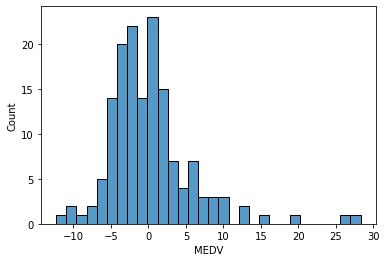

In [12]:
# We make a histogram to see if the residuals
# are normally distributed with mean value at 0.

sns.histplot(error, bins=30)

The residuals show a "fairly" normal distribution centered at 0. Not perfect, though. By visual inspection, there is some skew towards the left, with a few higher values towards the right of the distribution.

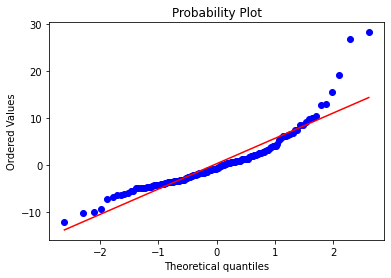

In [25]:
# We can also analyse the residuals distribution with 
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot, we see that the residuals deviate from the red line towards the right of the distribution; thus, they are not normally distributed.

## Homoscedasticity

Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s).So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" in the relationship between the independent variables and the target) is the same across all values of the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs. each of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot

- Levene’s test

- Barlett’s test

- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo, I will focus on residual plot analysis.

Text(0, 0.5, 'Residuals')

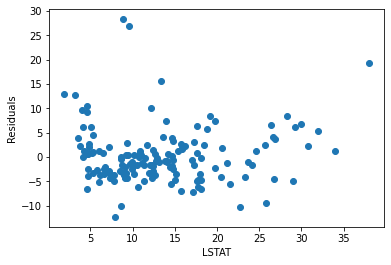

In [26]:
# Plot the residuals vs. one of the independent
# variables, LSTAT in this case.

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

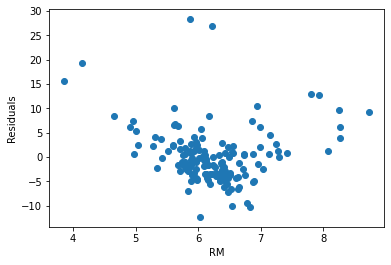

In [27]:
# Let's plot the residuals vs. RM.

plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

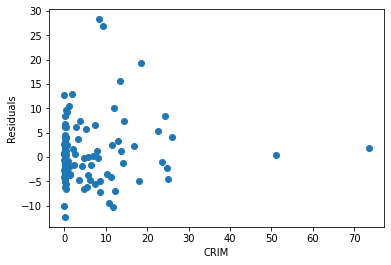

In [28]:
# Plot the residuals vs. one of the independent
# variables, CRIM in this case.

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

## Residual analysis with Yellowbrick

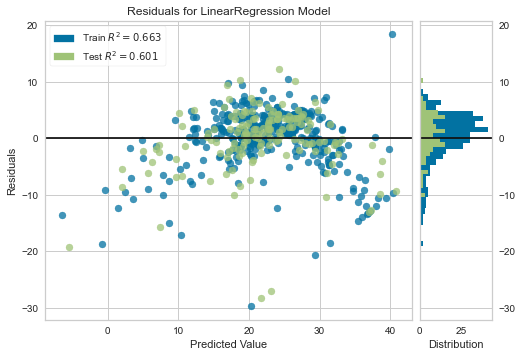

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
# I want to introduce Yellobrick,
# a library for visualisation of machine learning model 
# performance.

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook.

# Yellowbrick allows you to visualise the residuals of the
# models after fitting a linear regression.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the right, we see the distribution of the residuals in the train and test sets. The residuals are not centered at 0.

On the left, we see the residuals vs. the predictions. The residuals' variance is not constant, i.e., they are not homoscedastic. Towards the extremes of the prediction values, the model is under-estimating the outcome (most residuals are negative). On the contrary, towards the center of the prediction values, the model is over-estimating the outcome.

## Improving model fit

We will use the Box-Cox transformation on the numerical variables (more on this in a later section).

In [30]:
import scipy.stats as stats

# Apply the box-cox transformation to the variables.
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [31]:
# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [32]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



## Residuals

In [33]:
# Calculate the residuals.

error = y_test - pred

## Residual distribution

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

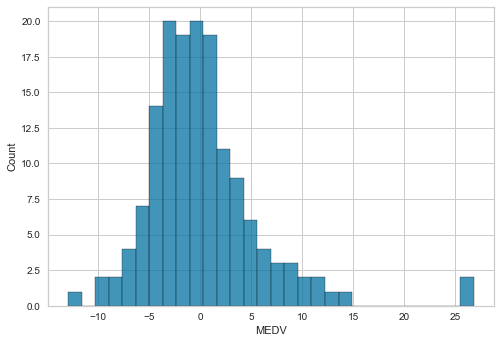

In [34]:
# We make a histogram to analyse the residuals'
# distribution.

sns.histplot(error, bins=30)

The residuals seem to be normally distributed and centered at 0.

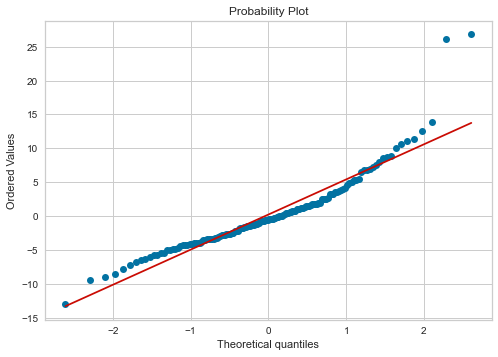

In [35]:
# We can also analise the residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

The residuals are normally distributed after transforming our variables.

## Yellowbrick

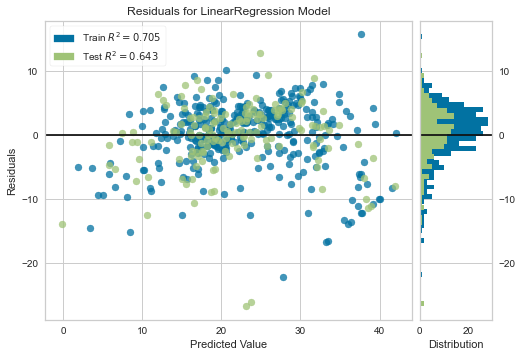

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a noticeable improvement in the distribution of the residuals, which are now centered at 0, and with similar variance across all values of the prediction.

**HOMEWORK**

Plot the residuals vs the transformed variables to determine homoscedasticity.

**NOTE**

The model performance would improve even further if we transformed the target as well. I leave that with you.

## Other model assumptions

To understand the relationships between predictor variables and the outcome, and predictor variables with themselves, we can evaluate the linear relationships and co-linearity.

First, I will show how the plots should look like using a toy dataframe with a variable that is linearly related to the target.

In [37]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y.

# This will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met.

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

We evaluate the linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 22.960000000000022, 'Independent variable')

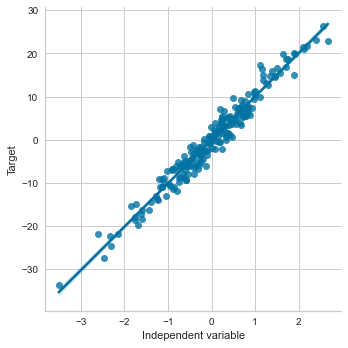

In [38]:
# With the toy data

# This is how the plot looks like when
# there is a linear relationship.

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y.

plt.ylabel('Target')
plt.xlabel('Independent variable')

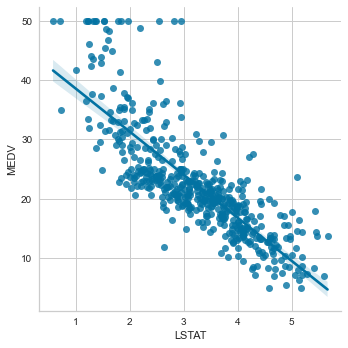

In [39]:
# Now we make a scatter plot for the boston
# house price dataset.
# (remember that we transformed the variables already)

# We plot LSTAT (% lower status of the population)
# vs. MEDV (median value of the house).

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left part of the plot.

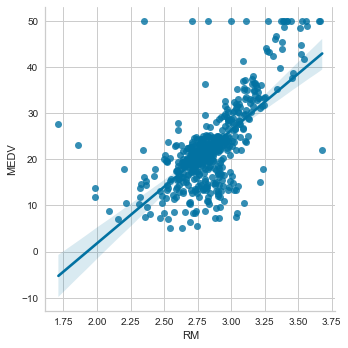

In [40]:
# Now we plot RM (average number of rooms per dwelling)
# vs. MEDV (median value of the house).

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and the transformed RM is not linear. We could consider, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

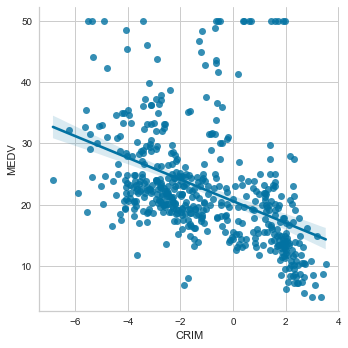

In [41]:
# Now we plot CRIM (per capita crime rate by town)
# vs. MEDV (median value of the house).

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

The relationship is also not perfectly linear between CRIM and MEDV, but it does go in that way.

**HOMEWORK**

Go ahead and compare the original relationships of LSTAT, RM and CRIM with the target. Even though the relationships after the transformation are not perfectly linear, you will notice that they go a bit in that direction after the transformation.

## Residual plots

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) Train a linear regression model using the desired variables (X).

2) Obtain the predictions .

3) Calculate the error (the difference between the true and predicted house prices).

4) Examine the error distribution.

If the house price, in this case, MEDV, is linearly explained by the variables, then the error should be random with a normal distribution centered at 0.

We will first evaluate the toy dataset so that we become familiar with what the plots should look like. Then we will evaluate LSTAT and finally, we will transform LSTAT to see how the transformation affects the residuals and the linear fit.

**Note**

This is a bit of an over-kill if what we are trying to do is predict an outcome from predictor variables. However, you may want to do this to better understand the relationships between your variables and the target.

Text(0, 0.5, 'Real value')

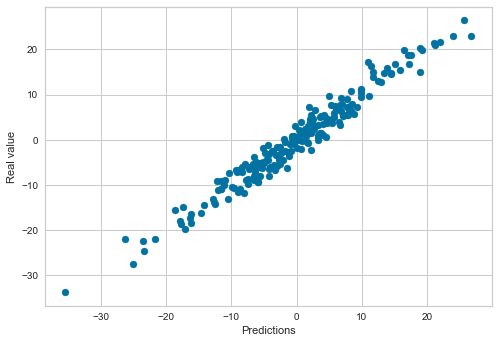

In [42]:
# Toy dataset.

# Step 1: train a linear model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# Step 2: obtain the predictions.
pred = linreg.predict(toy_df['x'].to_frame())

# Step 3: calculate the residuals.
error = toy_df['y'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

The model makes good predictions. The predictions are quite aligned with the real value of the target.

Text(0.5, 0, 'Independent variable x')

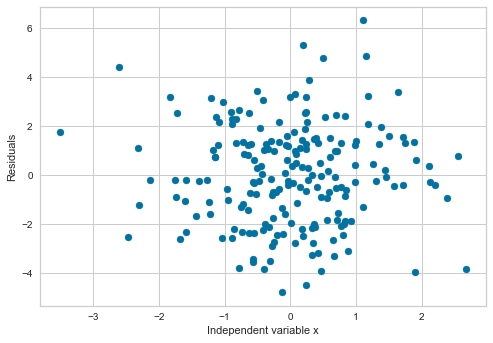

In [43]:
# Step 4: examine the distribution of the errors.

# Residuals plot.
# If the relationship is linear, the residuals should be
# random, centered at zero, and follow a normal distribution.

# We plot the error terms vs. the independent variable x.

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

Text(0.5, 0, 'Residuals')

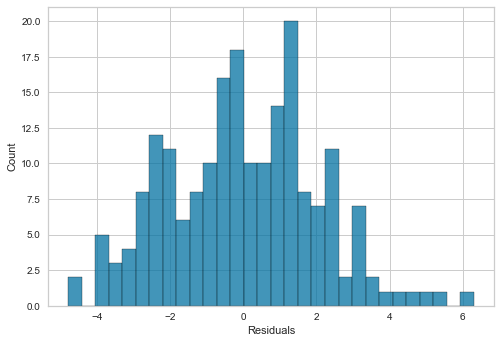

In [44]:
# Step 4: examine the distribution of the errors.

# Plot a histogram of the residuals.
# They should show a gaussian distribution
# centered around 0.

sns.histplot(error, bins=30)
plt.xlabel('Residuals')

The errors show a Gaussian distribution centered around 0. So the variable meets the assumptions of the model.

Let's do the same for LSTAT (remember that we already transformed this variable).

Text(0, 0.5, 'MEDV')

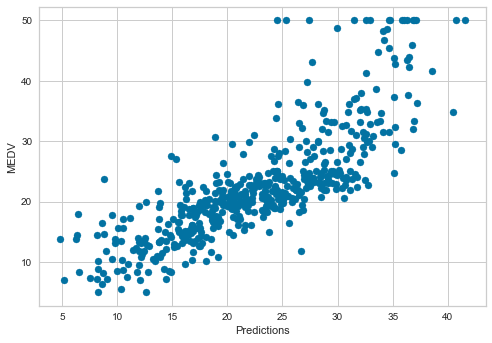

In [45]:
# The linear model from sklearn.
linreg = LinearRegression()

# Fit the model.
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# Make the predictions.
pred = linreg.predict(boston['LSTAT'].to_frame())

# Calculate the residuals.
error = boston['MEDV'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Most of the predictions are close to the real values. However, the model does not predict very well towards the highest house prices. For high house prices, the model under-estimates the price.

Text(0.5, 0, 'LSTAT')

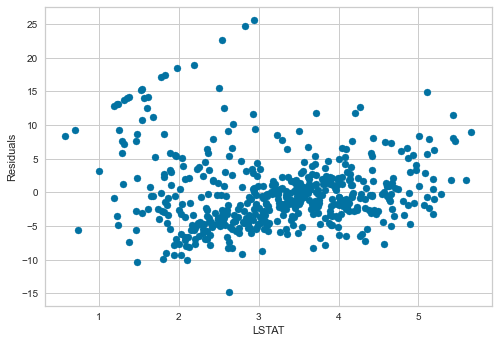

In [46]:
# Residuals plot.

# If the relationship is linear, the residuals should be
# random, centered at zero, and follow a normal distribution.

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are not really centered at zero. The errors are not homogeneously distributed across the values of LSTAT. Low and high values of LSTAT show higher errors. 

The relationship could be improved.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

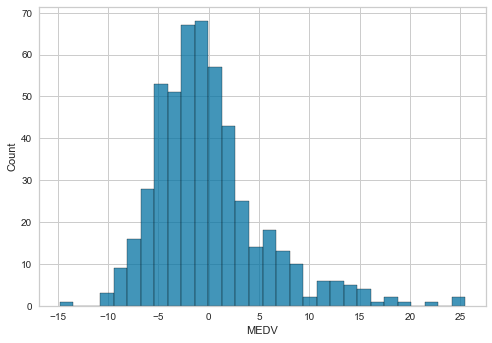

In [47]:
# Plot a histogram of the residuals.
# They should follow a gaussian distribution.

sns.histplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not normal.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of independent variables.

In [48]:
# Capture features in a list.

features = boston_dataset.feature_names

<AxesSubplot:>

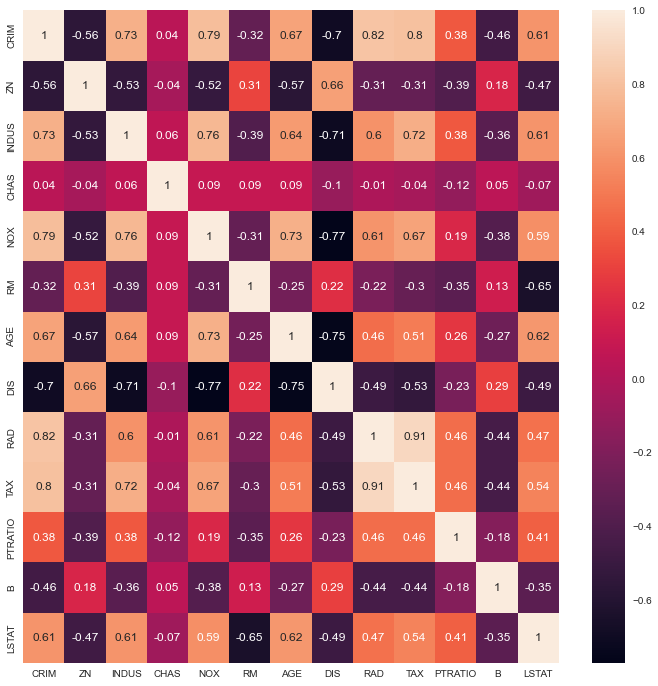

In [49]:
# We calculate the correlations using pandas corr()
# and we round the values to 2 decimals.
correlation_matrix = boston[features].corr().round(2)

# Plot the correlation matrix usng seaborn.
# We use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap, we see the variables of the Boston House dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These two variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

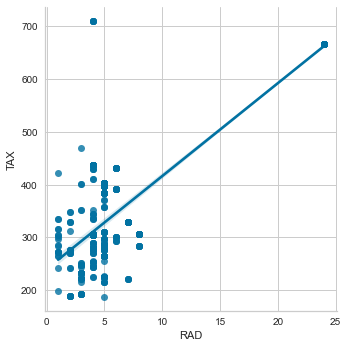

In [50]:
# Correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000).

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

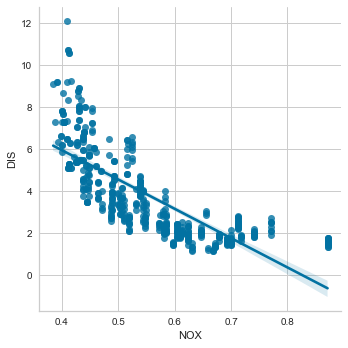

In [51]:
# Correlation between NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres).

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the scatter plot. So these variables are violating the assumption of no multi co-linearity.

We could remove one of the variables before training the linear model.